<a href="https://colab.research.google.com/github/kabirchhabra/Skillslash/blob/main/Car_Prediction/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement:


+ A chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
+ They have contracted an automobile consulting company to understand the factors on which the pricing of a car depends. Specifically, they want to understand the factors affecting the pricing of cars in the American marketing, since those may be very different from the Chinese market. Essentially, the company wants to know:
> 1. Which variables are significant in predicting the price of a car
> 2. How well those variables describes the price of car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

# Car Price Prediction - Assignment solution

The solution is divided into the following sections:
+ Data Understanding and exploration
+ Data Cleaning
+ Data preparation
+ Model building and evaluation

#1. Data Understanding and Exploration


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import LinearRegression

In [2]:
cars = pd.read_csv('https://raw.githubusercontent.com/kabirchhabra/Skillslash/main/Car_Prediction/CarPrice_Assignment.csv')

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#converting symboling to caregorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Understanding Data Dictionary**

In [6]:
#symboling: -2 (least risky) to +3 (most risky)
cars['symboling'].astype('category').value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [7]:
#aspiration: An internal combustion engine property showing
#whether the oxygen intake is through standard (atmospheric pressure)
#or through turbocharging (pressurised oxygen intake)
cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [8]:
#drivewheel: frontwheel, rarewheel or four-wheel drive
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


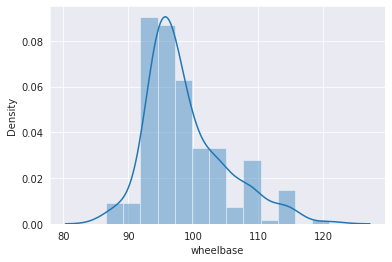

In [9]:
#wheelbase: distance between centre of front and rarewheels
sns.distplot(cars['wheelbase'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


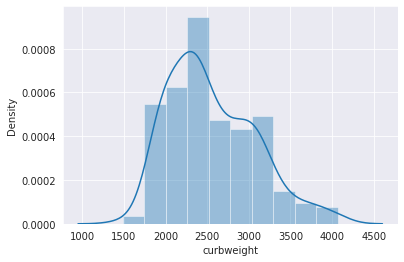

In [10]:
#curbweight: weight of car without occupants or baggage
sns.distplot(cars['curbweight'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


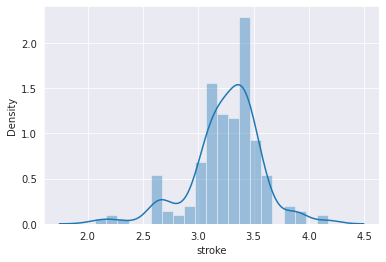

In [11]:
#stroke: volume of the engine (the distance travelled by the piston in each cycle)
sns.distplot(cars['stroke'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


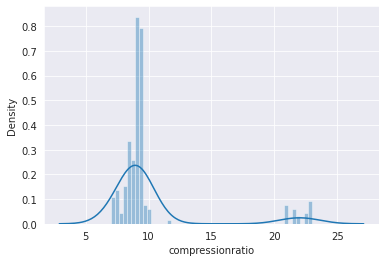

In [12]:
#compression ratio: ratio of volume of compression chamber at largest capacity to least capacity
sns.distplot(cars['compressionratio'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


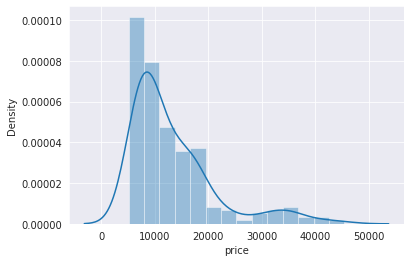

In [13]:
#target variable: price of car
sns.distplot(cars['price'])
plt.show()

**Data Exploration**
To perform Linear Regression, the (numeric) target variable should be linearly related to at least one another numeric variable. 

We'll first subset the list of all (independent) numeric variable, and then make a pairwise plot.

In [14]:
#all numeric(float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int'])
cars_numeric.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
cars_numeric.drop('car_ID', axis=1, inplace=True)
cars_numeric.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 1440x720 with 0 Axes>

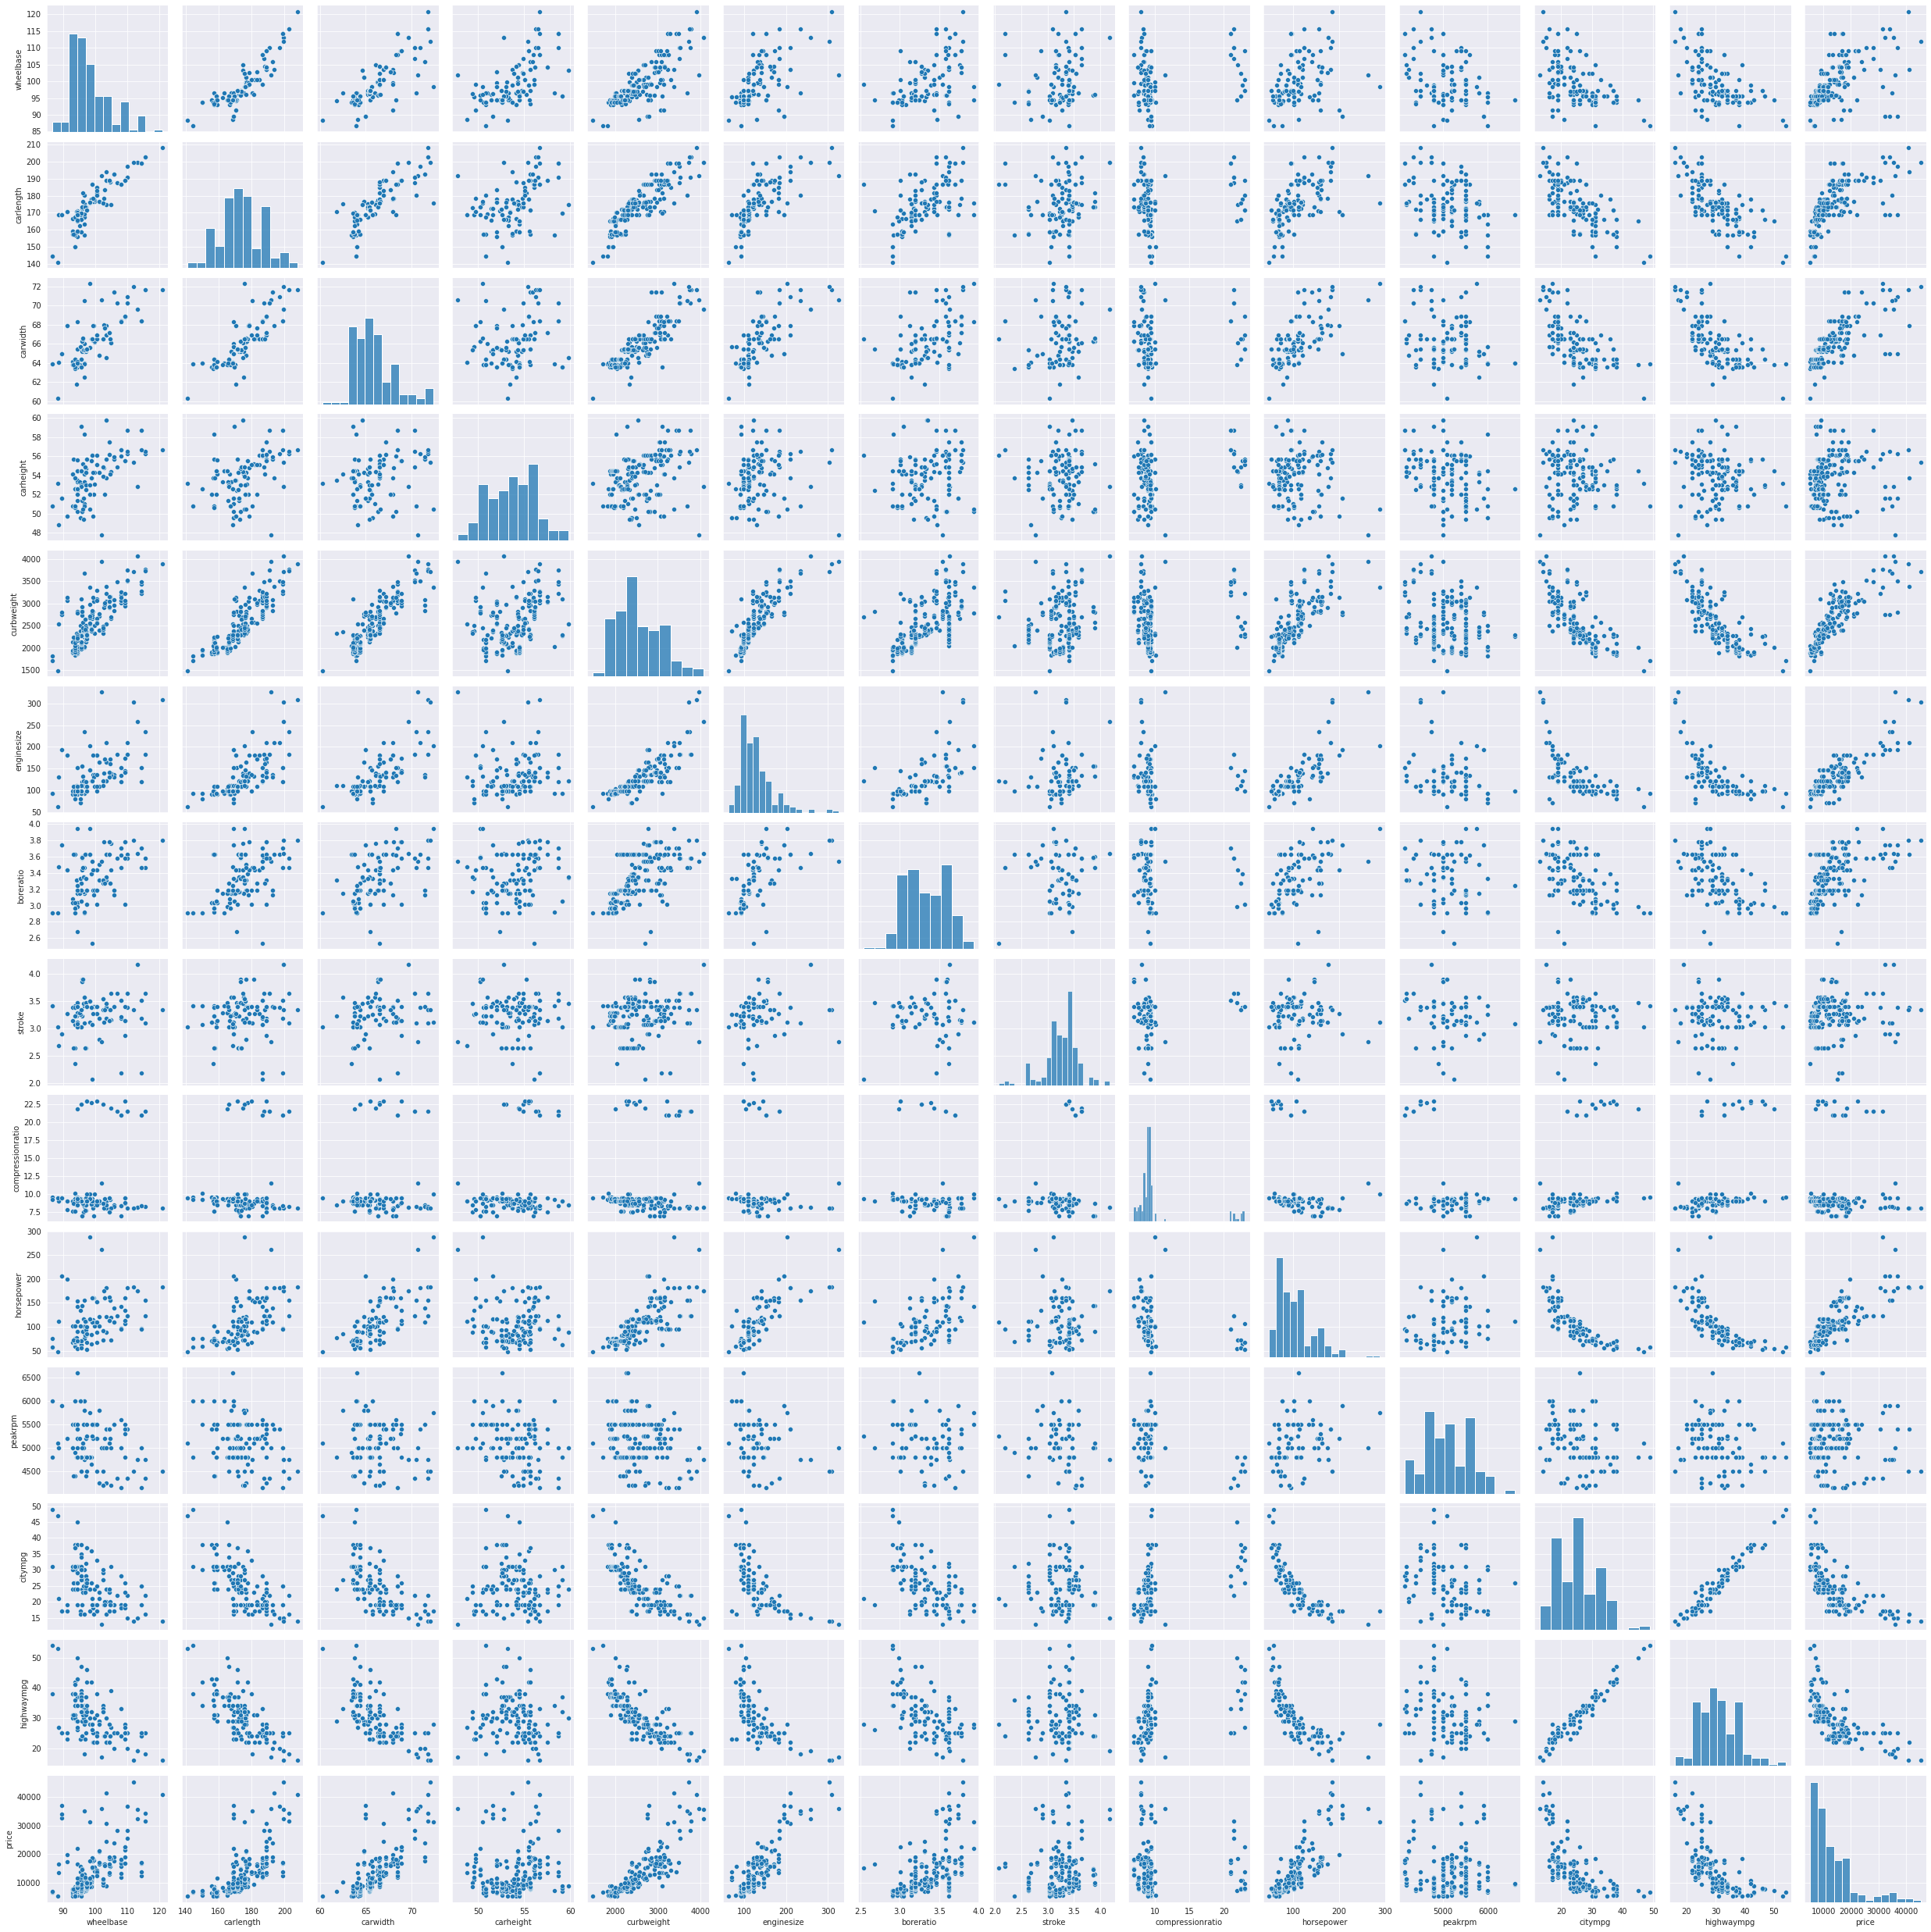

In [16]:
plt.figure(figsize=(20,10))
sns.pairplot(cars_numeric)
plt.show()

In [17]:
#Correlation matrix
cor = cars_numeric.corr()
cor

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


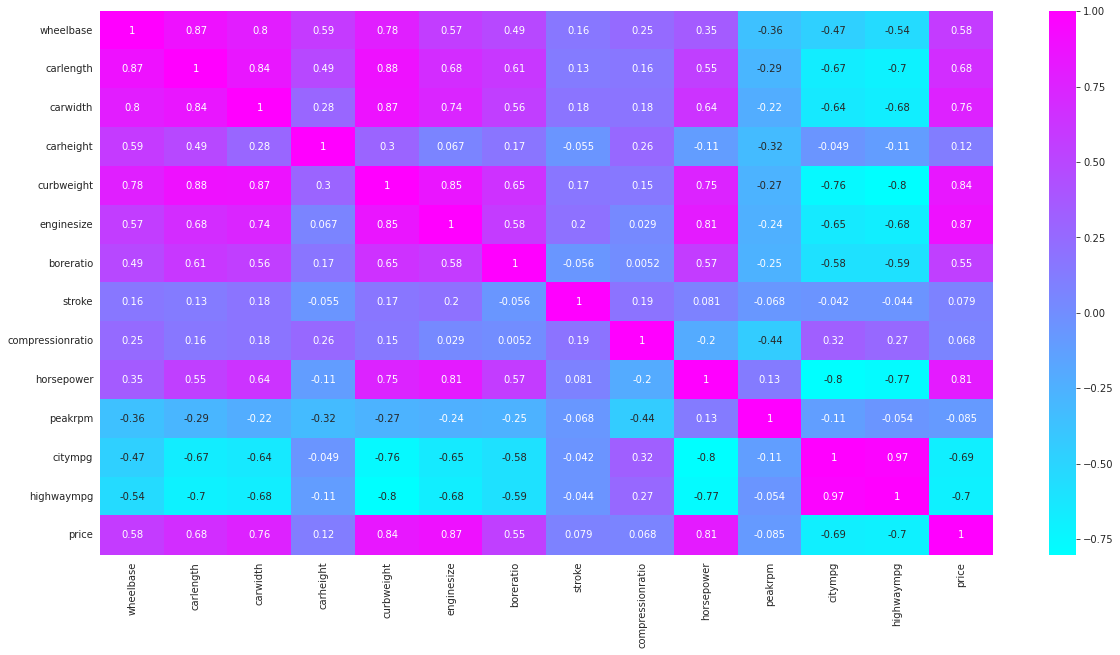

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(cor, annot=True,cmap='cool')
plt.show()

Through this heatmap we can visualize that:

Correlation of price with independent variables=>
> + Price is highly(positive) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower.
+ Price is negatively correlated to citympg and highwaympg (-0.70 approx). This suggests that cars having high mileage may fall in the 'economy' cars category, and are priced lower (like Maruti Alto/swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:
>+ Many independent variables are highly correlated: wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight' and are positively correlated.

Thus, while building the model, we'll pay attemtion to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multi collinearity.)

#2. Data Cleaning

Let's conduct some data cleaning steps.

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except 'symboling', which should rather be a categorical variable (so that dummy variable are created for the categories).

In [19]:
cars['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

We need to extract only the company name from the car name. This will reduce the chance of overfitting.

In [20]:
#Extracting company names
#Method-1: str.split() by space

carnames = cars['CarName'].apply(lambda x:x.split(' ')[0])
carnames

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [21]:
#Method-2 using re
import re
#we need any alphanumeric sequence before a space, it may also contain hyphens

p = re.compile(r'\w+-?\w+')
carnames = cars['CarName'].apply(lambda x:re.findall(p,x)[0])
carnames

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [22]:
cars['car_company'] = carnames

In [23]:
cars['car_company'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: car_company, dtype: int64

Some car-company names are misspelled - vw and volkswagen should be volkswagon, porcshe should be porsche, toyouta should be toyota, Nissan should be nissan, maxda should be mazda etc.

In [24]:
#Replacing misspelled names

cars.loc[(cars['car_company']=='vw') | (cars['car_company']=='vokswagen'), 'car_company'] = 'volkswagen'

cars.loc[cars['car_company']=='porcshe', 'car_company'] = 'porsche' 

cars.loc[cars['car_company']=='maxda', 'car_company'] = 'mazda'

cars.loc[cars['car_company']=='toyouta', 'car_company'] = 'toyota'

cars.loc[cars['car_company']=='Nissan', 'car_company'] = 'nissan'

In [25]:
cars['car_company'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [26]:
#drop the carname variable
cars = cars.drop('CarName', axis=1)

In [27]:
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#3. Data Preparation

Split X and Y

In [28]:
cars.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'car_company'],
      dtype='object')

In [29]:
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration','doornumber', 'carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','car_company']]

In [30]:
y = cars['price']

In [31]:
#creating dummy variables for categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [32]:
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_peugeot,car_company_plymouth,car_company_porcshce,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X = X.drop(list(cars_categorical.columns), axis=1)

In [34]:
X = pd.concat([X,cars_dummies], axis=1)

In [35]:
#scaling the features
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


In [36]:
#split into train and test
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=100)

#4.Model Building and Evaluation

In [38]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [39]:
print(lm.coef_)

[ 1.28804792e+03 -1.04955210e+03  1.68834559e+03 -1.25904071e+03
  2.42027090e+03  1.16263350e+04 -4.85038954e+03 -1.13424087e+03
 -2.56951960e+03 -9.73644812e+02  1.35681433e+03 -2.61818510e+02
  7.44239551e+02  7.36334360e+02  8.01800617e+02  7.02360200e+02
  6.47750839e+02  3.50558608e+02 -1.20683560e+03  1.01248452e+03
 -2.33385958e+02 -7.69280387e+02 -1.83640992e+03 -1.66162816e+03
 -9.12566337e+02 -9.28943930e+01  4.42816604e+02  1.15665864e+03
  5.50557360e+02  6.45972107e+01  1.55937229e+02  9.01690070e+02
 -2.89587453e+02  2.03544173e+03  2.20137145e+03  6.79103088e+03
  1.39274072e+03  1.78808440e+03 -1.04955642e+03  2.03544173e+03
  4.50875447e+02 -1.64299332e+02  1.20683560e+03 -9.09494702e-13
 -2.08926886e+02 -5.83874480e+01  1.02318154e-12  5.21573928e+02
  2.39504091e+03  3.76793525e+02 -1.83326364e+02 -6.98406228e+02
 -5.19749514e+02  6.03320099e+01 -4.92211850e+02  3.10813552e+02
 -1.59161573e-12 -1.05964701e+03  3.61145168e+02 -4.85552717e+02
 -6.84202629e+02  0.00000

In [40]:
print(lm.intercept_)

13355.057895546099


In [41]:
#prediciton
y_pred = lm.predict(X_test)

#metrics
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8245494611097526

We are getting approx 83% r-squared with all the variables. Let's see how much we can get with lesser features.

**Model Building using RFE**

Let's now build a model using Recursive Feature Elimination to select features. We'll first start off with an arbitrary number of feayures, and then use the statsmodel library to build models using the shortlisted features.

RFE will remove columns based on correaltion values.

**RFE with 15 features**

In [42]:
from sklearn.feature_selection import RFE
lm = LinearRegression()

rfe_15 = RFE(lm,step=15)

rfe_15.fit(X_train, y_train)

#Printing the boolean results
print(rfe_15.support_)
print(rfe_15.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True False
  True False False False False False  True  True False  True  True  True
  True False False  True False False False  True False  True  True  True
 False  True  True  True False False  True False False False False False
  True False False  True False False False False False  True False  True
 False False  True False  True False False False  True]
[1 1 1 1 1 1 1 1 1 1 1 3 1 2 2 3 2 3 1 1 4 1 1 1 1 4 3 1 3 4 4 1 3 1 1 1 2
 1 1 1 3 4 1 4 4 4 4 3 1 3 4 1 3 4 3 3 4 1 3 1 3 4 1 4 1 2 3 4 1]


In [43]:
y_pred = rfe_15.predict(X_test)
print(r2_score(y_test, y_pred))

0.8814268817870493


**RFE with 6 features**

In [44]:
lm = LinearRegression()

rfe_6 = RFE(lm,step=6)

rfe_6.fit(X_train, y_train)

#Printing the boolean results
print(rfe_6.support_)
print(rfe_6.ranking_)

[ True  True  True  True  True  True  True  True  True False  True False
 False False False False False False  True  True False  True  True  True
  True False False  True False False False  True False  True  True  True
 False  True  True  True  True False  True False False False False False
  True False False  True False False False False False  True False  True
  True False  True False  True False False False  True]
[1 1 1 1 1 1 1 1 1 3 1 5 4 2 2 2 2 3 1 1 5 1 1 1 1 6 3 1 3 6 6 1 4 1 1 1 2
 1 1 1 1 6 1 7 6 7 7 4 1 4 5 1 3 6 3 5 7 1 4 1 1 7 1 7 1 4 5 5 1]


In [45]:
y_pred = rfe_6.predict(X_test)
print(r2_score(y_test, y_pred))

0.8806282103536893


Note: RFE with 6 features is giving about 88% r-squared, compared to 89% with 15 features, Should we then choose more features for slightly better performance? 

A better metrics to look at is adjusted r-squared, which penalises a model for having more features, and thus weighs both the goodness of fit and model complexity. Let's use statsmodel library for this.

**Model building and evaluation**

In [46]:
import statsmodels.api as sm
col_15 = X_train.columns[rfe_15.support_]

X_train_rfe_15 = X_train[col_15]

X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
X_train_rfe_15.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_idi,car_company_bmw,car_company_dodge,car_company_mitsubishi,car_company_peugeot,car_company_porsche,car_company_saab,car_company_volvo
122,1.0,-0.841772,-0.548402,-0.984972,-1.199923,-0.701886,-0.695874,-1.331531,-0.081241,-0.187398,...,-0.070014,-0.141069,-0.328798,-0.201517,-0.214286,-0.260208,-0.23812,-0.141069,-0.17364,-0.238120
125,1.0,-0.708596,-0.418396,1.117866,-1.446071,0.428245,0.579974,2.258638,-0.464834,-0.162161,...,-0.070014,-0.141069,-0.328798,-0.201517,-0.214286,-0.260208,-0.23812,7.088723,-0.17364,-0.238120
166,1.0,-0.708596,-0.434647,-0.891512,-0.461478,-0.492032,-0.695874,-0.332206,-0.560733,-0.187398,...,-0.070014,-0.141069,-0.328798,-0.201517,-0.214286,-0.260208,-0.23812,-0.141069,-0.17364,-0.238120
1,1.0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,...,-0.070014,-0.141069,-0.328798,-0.201517,-0.214286,-0.260208,-0.23812,-0.141069,-0.17364,-0.238120
199,1.0,0.922815,1.198549,0.603839,1.548733,1.157921,0.074449,1.074252,-0.336970,-0.666913,...,-0.070014,-0.141069,-0.328798,-0.201517,-0.214286,-0.260208,-0.23812,-0.141069,-0.17364,4.199567


In [47]:
#fitting model with 15 variables
lm_15 = sm.OLS(y_train, X_train_rfe_15).fit()
lm_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     93.72
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           6.47e-66
Time:                        16:37:00   Log-Likelihood:                -1245.2
No. Observations:                 143   AIC:                             2556.
Df Residuals:                     110   BIC:                             2654.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.339e+04    151.536     88.372      0.000    1.31e+04    1.37e+04
wheelbase               1431.4738    498.093      2.874      0.005     444.371    2418.576
carlength               -816.2406    612.121     -1.333      0.185   -2029.321     396.840
carwidth                1688.9906    461.530      3.660      0.000     774.347    2603.634
carheight               -655.0315    303.754     -2.156      0.033   -1257.001     -53.062
curbweight              1957.0055    763.788      2.562      0.012     443.358    3470.653
enginesize              7931.5956   1150.442      6.894      0.000    5651.689    1.02e+04
boreratio              -3090.4895    571.255     -5.410      0.000   -4222.582   -1958.397
stroke                 -1331.1556    292.138     -4.557      0.000   -1910.105    -752.206
compressionratio       -1579.9065   1941.979     -0.814      0.418   -5428.454    2268.641
horsepower               303.7249    606.908      0.500      0.618    -899.025    1506.475
peakrpm                  469.4336    243.074      1.931      0.056     -12.283     951.150
highwaympg               528.4232    459.681      1.150      0.253    -382.556    1439.403
fueltype_gas            -884.4372    986.644     -0.896      0.372   -2839.734    1070.860
aspiration_turbo         691.6619    310.273      2.229      0.028      76.773    1306.550
carbody_hardtop         -515.4388    335.445     -1.537      0.127   -1180.213     149.335
carbody_hatchback      -1714.5328    599.459     -2.860      0.005   -2902.520    -526.545
carbody_sedan          -1347.4961    670.751     -2.009      0.047   -2676.768     -18.224
carbody_wagon           -800.4315    483.246     -1.656      0.100   -1758.112     157.249
enginelocation_rear     1187.8733    381.552      3.113      0.002     431.726    1944.020
enginetype_ohcf          316.5953    291.600      1.086      0.280    -261.288     894.478
enginetype_rotor        1302.8641    198.707      6.557      0.000     909.073    1696.655
cylindernumber_five     1340.3479    326.048      4.111      0.000     694.197    1986.499
cylindernumber_four     3456.8941    743.875      4.647      0.000    1982.707    4931.081
cylindernumber_three    1045.0545    203.508      5.135      0.000     641.750    1448.359
cylindernumber_twelve  -1137.8128    322.654     -3.526      0.001   -1777.237    -498.388
cylindernumber_two      1302.8641    198.707      6.557      0.000     909.073    1696.655
fuelsystem_idi           884.4372    986.644      0.896      0.372   -1070.860    2839.734
car_company_bmw         2114.8893    178.551     11.845      0.000    1761.043    2468.736
car_company_dodge       -340.2396    168.610     -2.018      0.046    -674.385      -6.094
car_company_mitsubishi  -730.9262    177.912     -4.108      0.000   -1083.505  

The model with 15 variables gives about 95% adjusted r-squared.

In [48]:
X_test_rfe_15 = X_test[col_15]

X_test_rfe_15 = sm.add_constant(X_test_rfe_15, has_constant='add')

y_pred = lm_15.predict(X_test_rfe_15)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [49]:
#r-squared
r2_score(y_test, y_pred)

0.8814268817870493

The test r-squared model with 15 features is about 89%, whereas the training was about 93%. Let's compare the same for the model with 6 features.

In [50]:
#subset the features selected by rfe_6
col_6 = X_train.columns[rfe_6.support_]

X_train_rfe_6 = X_train[col_6]

X_train_rfe_6 = sm.add_constant(X_train_rfe_6)
X_train_rfe_6.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,fuelsystem_2bbl,fuelsystem_idi,car_company_bmw,car_company_dodge,car_company_mitsubishi,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_saab,car_company_volvo
122,1.0,-0.841772,-0.548402,-0.984972,-1.199923,-0.701886,-0.695874,-1.331531,-0.081241,-0.187398,...,1.451227,-0.328798,-0.201517,-0.214286,-0.260208,-0.23812,5.318432,-0.141069,-0.17364,-0.238120
125,1.0,-0.708596,-0.418396,1.117866,-1.446071,0.428245,0.579974,2.258638,-0.464834,-0.162161,...,-0.689072,-0.328798,-0.201517,-0.214286,-0.260208,-0.23812,-0.188025,7.088723,-0.17364,-0.238120
166,1.0,-0.708596,-0.434647,-0.891512,-0.461478,-0.492032,-0.695874,-0.332206,-0.560733,-0.187398,...,-0.689072,-0.328798,-0.201517,-0.214286,-0.260208,-0.23812,-0.188025,-0.141069,-0.17364,-0.238120
1,1.0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,...,-0.689072,-0.328798,-0.201517,-0.214286,-0.260208,-0.23812,-0.188025,-0.141069,-0.17364,-0.238120
199,1.0,0.922815,1.198549,0.603839,1.548733,1.157921,0.074449,1.074252,-0.336970,-0.666913,...,-0.689072,-0.328798,-0.201517,-0.214286,-0.260208,-0.23812,-0.188025,-0.141069,-0.17364,4.199567


In [52]:
#fitting model with 15 variables
lm_6 = sm.OLS(y_train, X_train_rfe_6).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     110.2
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.27e-69
Time:                        16:39:46   Log-Likelihood:                -1234.0
No. Observations:                 143   AIC:                             2534.
Df Residuals:                     110   BIC:                             2632.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.331e+04    138.136     96.319      0.000     1.3e+04    1.36e+04
wheelbase               1551.4308    457.607      3.390      0.001     644.562    2458.300
carlength               -838.4150    539.513     -1.554      0.123   -1907.603     230.773
carwidth                1733.6242    414.494      4.183      0.000     912.193    2555.055
carheight              -1104.5237    294.953     -3.745      0.000   -1689.052    -519.995
curbweight              2089.5629    655.098      3.190      0.002     791.313    3387.813
enginesize              7972.8846   1055.690      7.552      0.000    5880.754    1.01e+04
boreratio              -3367.1322    506.247     -6.651      0.000   -4370.395   -2363.870
stroke                 -1128.5885    276.806     -4.077      0.000   -1677.153    -580.024
compressionratio       -2529.5728   1708.045     -1.481      0.141   -5914.518     855.372
peakrpm                  756.7144    205.668      3.679      0.000     349.129    1164.299
fueltype_gas           -1520.0313    903.639     -1.682      0.095   -3310.832     270.770
aspiration_turbo         789.6085    262.062      3.013      0.003     270.262    1308.955
carbody_hardtop         -547.5919    303.229     -1.806      0.074   -1148.520      53.336
carbody_hatchback      -1781.3060    529.230     -3.366      0.001   -2830.116    -732.496
carbody_sedan          -1457.9206    584.822     -2.493      0.014   -2616.901    -298.940
carbody_wagon           -806.1464    417.204     -1.932      0.056   -1632.947      20.655
enginelocation_rear     1158.5949    351.498      3.296      0.001     462.007    1855.182
enginetype_ohcf          412.5289    265.489      1.554      0.123    -113.608     938.665
enginetype_rotor        1252.5329    174.748      7.168      0.000     906.224    1598.842
cylindernumber_five     1249.4291    271.894      4.595      0.000     710.600    1788.258
cylindernumber_four     3552.3383    582.068      6.103      0.000    2398.816    4705.860
cylindernumber_three    1104.1169    162.057      6.813      0.000     782.958    1425.276
cylindernumber_twelve  -1100.4484    268.006     -4.106      0.000   -1631.574    -569.323
cylindernumber_two      1252.5329    174.748      7.168      0.000     906.224    1598.842
fuelsystem_2bbl          772.1832    204.539      3.775      0.000     366.835    1177.531
fuelsystem_idi          1520.0313    903.639      1.682      0.095    -270.770    3310.832
car_company_bmw         2292.5927    168.518     13.604      0.000    1958.630    2626.555
car_company_dodge       -592.7358    164.312     -3.607      0.000    -918.363    -267.108
car_company_mitsubishi -1012.6755    174.310     -5.810      0.000   -1358.118    -667.233
car_company_peugeot     -801.4718    231.591     -3.461      0.001   -1260.431  

In [54]:
X_test_rfe_6 = X_test[col_6]

X_test_rfe_6 = sm.add_constant(X_test_rfe_6, has_constant='add')

y_pred = lm_6.predict(X_test_rfe_6)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [55]:
#r-squared
r2_score(y_test, y_pred)

0.8806282103536888

**Choosing the optimal number of features**
Now, we have seen that the adjusted r-squared varies from 93.4 to 88 as we go from 15 to 6 features, one way to choose the optimal number of features is to make a plot between n_features and adjusted r-squared, and then choose the value of n_features.